#### Laborator 3

In [3]:
import numpy as np
import matplotlib.pyplot as plt

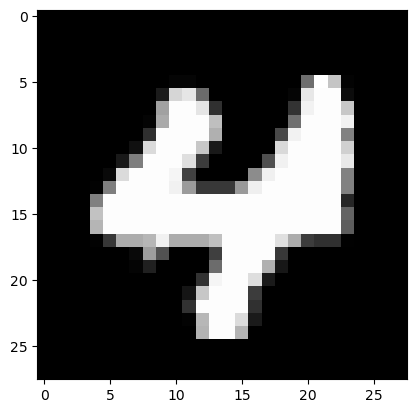

In [4]:
train_images = np.loadtxt('data/train_images.txt')
train_labels = np.loadtxt('data/train_labels.txt', dtype=int)
test_images = np.loadtxt('data/test_images.txt')
test_labels = np.loadtxt('data/test_labels.txt', dtype=int)

image = train_images[0]
image = np.reshape(image, (28, 28))
plt.imshow(image.astype (np.uint8), cmap='gray')
plt.show()

The predicted class is  2


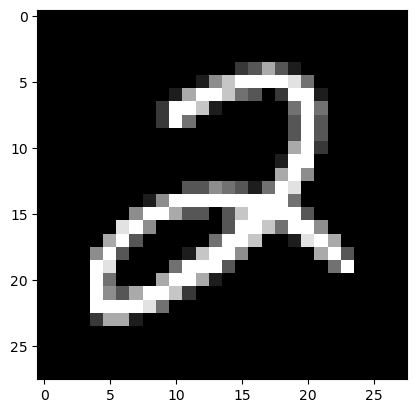

In [17]:
class KnnClassifier:
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
    def classify_image(self, test_image, num_neighbors = 3, metric ='l2'):
        if metric == 'l1':
            distances = np.sum(np.abs(self.train_images - test_image), axis=1)
        elif metric == 'l2':
            distances = np.sqrt(np.sum(np.square(self.train_images - test_image), axis=1))
            
        sorted_indices = np.argsort(distances)
        nearest_indices = sorted_indices[:num_neighbors]
        nearest_labels = self.train_labels[nearest_indices]
        class_counts = np.bincount(nearest_labels)
        return np.argmax(class_counts)
        
clf = KnnClassifier(train_images, train_labels)
print('The predicted class is ', clf.classify_image(test_images[0]))
plt.imshow(test_images[0].reshape(28, 28).astype (np.uint8), cmap='gray')
plt.show()   
    

In [10]:
predicted_labels = []
for i in range(len(test_images)):
    predicted_labels.append(clf.classify_image(test_images[i]))
predicted_labels = np.array(predicted_labels)
np.savetxt('predicted_labels.txt', predicted_labels)
accuracy = np.mean(predicted_labels == test_labels)
print(f'The accuracy is {accuracy*100}%')

The accuracy is 89.8%


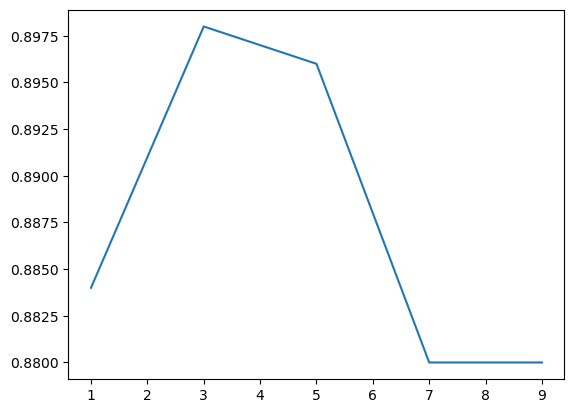

In [18]:
accuracy_scores_l2 = []
for i in range(1, 10, 2):
    predicted_labels = []
    for j in range(len(test_images)):
        predicted_labels.append(clf.classify_image(test_images[j], num_neighbors = i, metric = 'l2'))
    predicted_labels = np.array(predicted_labels)
    accuracy = np.mean(predicted_labels == test_labels)
    accuracy_scores_l2.append(accuracy)
np.savetxt('acuratete_l2.txt', accuracy_scores_l2)
plt.plot(range(1, 10, 2), accuracy_scores_l2)

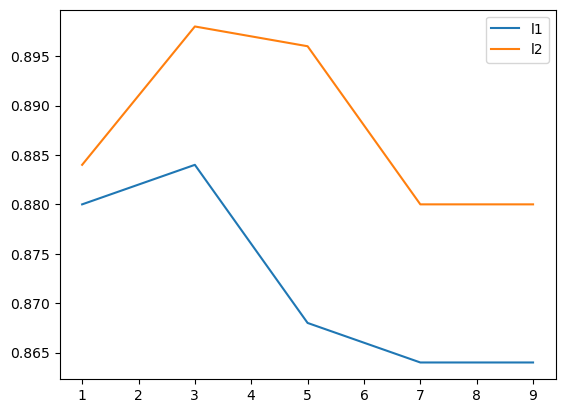

In [19]:
accuracy_scores_l1 = []
for i in range(1, 10, 2):
    predicted_labels = []
    for j in range(len(test_images)):
        predicted_labels.append(clf.classify_image(test_images[j], num_neighbors = i, metric = 'l1'))
    predicted_labels = np.array(predicted_labels)
    accuracy = np.mean(predicted_labels == test_labels)
    accuracy_scores_l1.append(accuracy)
accuracy_scores_l2 = np.loadtxt('acuratete_l2.txt')

plt.plot(range(1, 10, 2), accuracy_scores_l1, label = 'l1 ')
plt.plot(range(1, 10, 2), accuracy_scores_l2, label = 'l2')
plt.legend()
plt.show()